In [35]:
import arviz as az
import pymc3 as pm
# import arviz.labels as azl

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import matplotlib as mpl
import warnings
import functions as funcs
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
def R(x):
    return 1/x

In [73]:
features = ['dihedrals', 'distances_linear']
inp_dir = 'sensitivities_m52'

#
var_name_map={"l_cluster__k_s": r"$R_{n}$", 
                "l_tica__dim_s": r"$R_{m}$", 
                "l_tica__lag_s": r"$R_{tau}$",
                "l_distances__scheme[closest-heavy]_s": r"$R_{s:\mathrm{closest}}$", 
             "l_distances__scheme[ca]_s": r"$R_{s:C\alpha}$"}


1fme dihedrals
1fme distances_linear
2f4k dihedrals
2f4k distances_linear
2jof dihedrals
2jof distances_linear
2wav dihedrals
2wav distances_linear
cln025 dihedrals
cln025 distances_linear
gtt dihedrals
gtt distances_linear
prb dihedrals
prb distances_linear
uvf dihedrals
uvf distances_linear


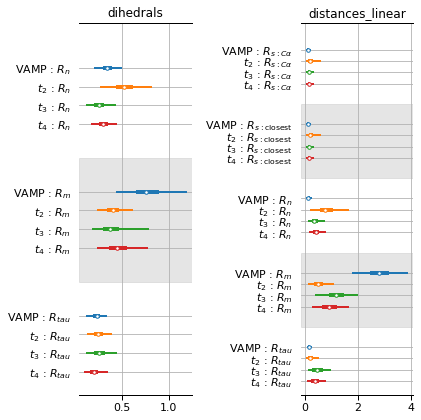

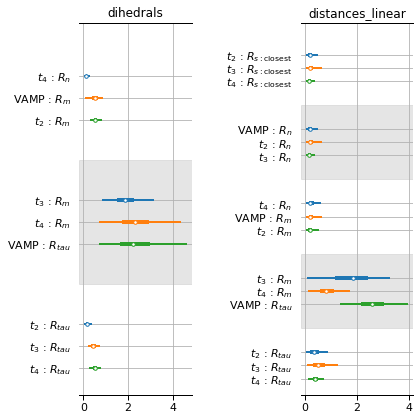

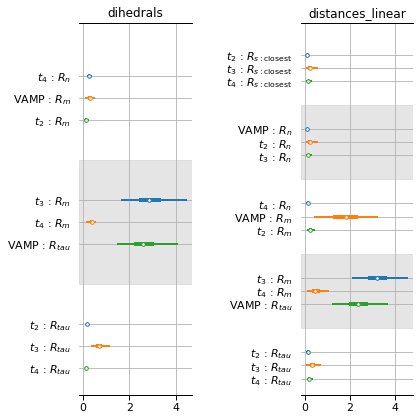

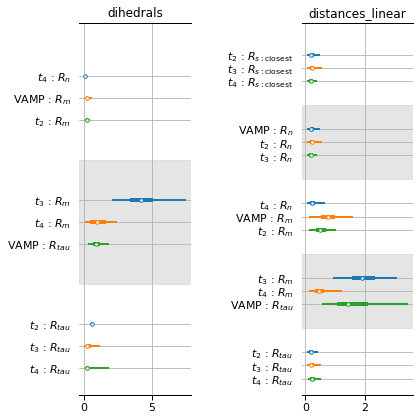

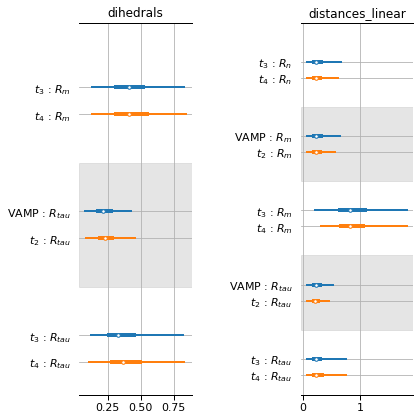

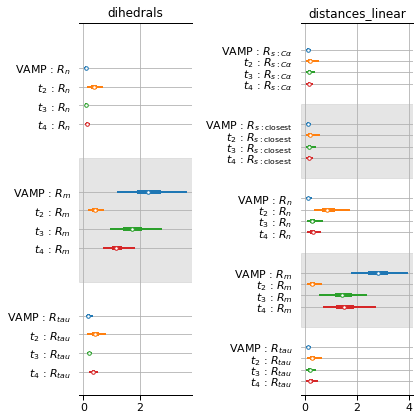

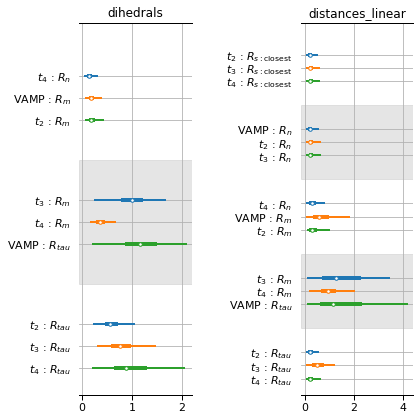

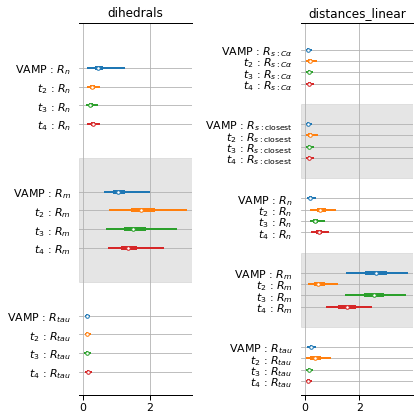

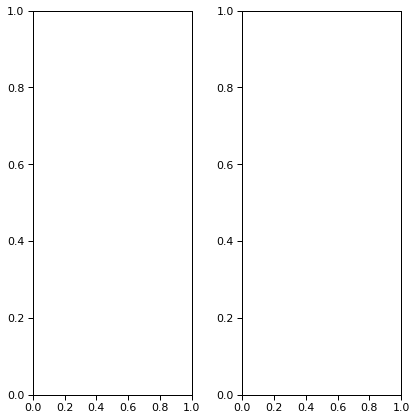

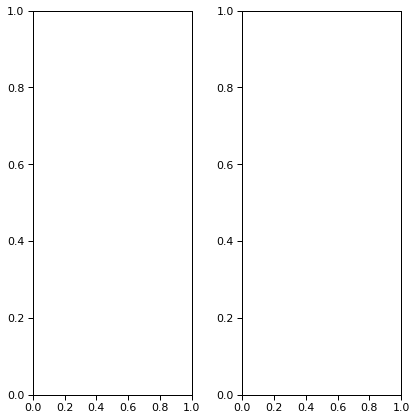

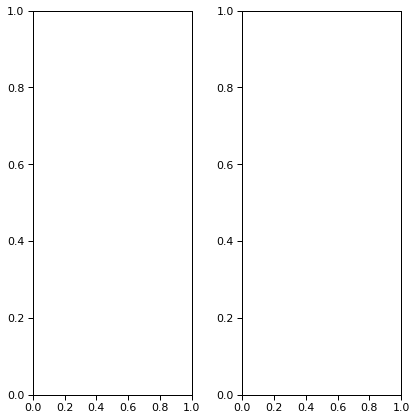

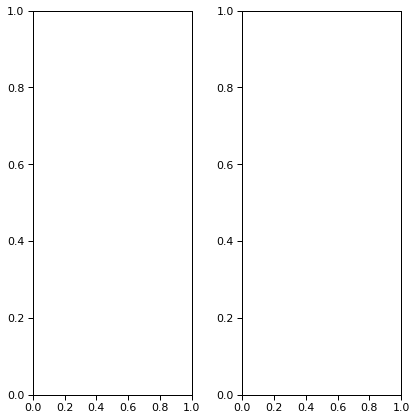

In [75]:
for protein in funcs.PROTEIN_DIRS:
    with sns.plotting_context('paper', font_scale=1.25):
        fig, axes = plt.subplots(1, len(features), figsize=(6, 6))  
        
        for feat_ix, feature in enumerate(features):
            
            timescale_paths = list(Path(inp_dir).glob(f"{protein}_{feature}_timescale_its*"))

            if len(timescale_paths) > 0:
                
                print(protein, feature)
                
                # Get data
                timescale_paths.sort()
                vamp_path = Path(inp_dir).joinpath(f"{protein}_{feature}_vamp_sensitivity.pkl")

                all_model_paths = [vamp_path]+timescale_paths
                all_models = [pickle.load(x.open('rb')) for x in all_model_paths]
                all_traces = [x['trace'] for x in all_models]

                # Get model names
                model_names = []
                for x in all_model_paths:
                    text = np.array(str(x.stem).split('_'))
                    outcome_ix = np.where((text=='timescale') | (text == 'vamp'))[0][0]
                    outcome = text[outcome_ix]
                    if outcome == 'timescale':
                        num_its = text[outcome_ix+2]
                        outcome = f'$t_{{{num_its}}}$'
                    if outcome == 'vamp':
                        outcome = outcome.upper()
                    model_names.append(outcome)

                # Plot
                pm.plot_forest(all_traces, model_names=model_names, 
                               combined=True, filter_vars='regex', linewidth=2, 
                       var_names='^l.*', transform=R, ax=axes[feat_ix], hdi_prob=0.95)
                axes[feat_ix].grid()
                axes[feat_ix].set_title(feature)
                # Adjust axes labels
                labels = axes[feat_ix].yaxis.get_majorticklabels()
                def labeller(pos, x):
                    label = labels[x]
                    old_text = label.get_text()

                    if '__' in old_text:
                        var = old_text.split(':')[-1].strip()
                        new_var = var_name_map[var]
                        new_txt = f"{old_text.split(':')[0]} : {new_var}" 
                    else:
                        new_txt = old_text
                    return new_txt

                axes[feat_ix].yaxis.set_major_formatter(labeller)

        plt.tight_layout()
        plt.savefig(funcs.FIG_DIR.joinpath(f'sensitivities/{protein}_sensitivity.pdf'), bbox_inches='tight')

In [56]:
text = np.array(x.split('_'))
np.where(np.array(text)==protein)[0][0]

np.where((text=='timescale') | (text == 'vamp'))[0][0]

3